In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import matplotlib as mpl

mpl.rcParams['figure.facecolor'] = 'w'
mpl.rcParams['errorbar.capsize'] = 6
mpl.rcParams['font.size'] = 30
mpl.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"][0] = 9
plt.rcParams["figure.figsize"][1] = 4

In [2]:
root_path = 'replica-results/'
mname = "msd_short_monomer.xvg"
tname = "msd_short_trimer.xvg"
lname = "msd_short_lipid.xvg"
folder_suffixes = ['_srd1/', '_srd2/', '_srd3/', '_titan/']

afs = ['5af', '10af', '20af']

m_avgs, t_avgs, l_avgs = [], [], []
m_std, t_std, l_std = [], [], []

for i, af in enumerate(afs):
    
    _monomer = []
    _trimer = []
    _lipid = []
    
    for suff in folder_suffixes:
        
        step = 1
        if suff == '_titan/':
            step = 2

        # Load monomer
        monomer_path = root_path + af + suff + mname
        print("Reading %s" % monomer_path)
        _mdat = np.loadtxt(monomer_path, comments=['#', '@'])[::step].T
        _monomer.append(_mdat)

        # Load trimer
        trimer_path = root_path + af + suff + tname
        print("Reading %s" % trimer_path)
        _tdat = np.loadtxt(trimer_path, comments=['#', '@'])[::step].T
        _trimer.append(_tdat)

        # Load lipid
        lipid_path = root_path + af + suff + lname
        print("Reading %s" % lipid_path)
        _ldat = np.loadtxt(lipid_path, comments=['#', '@'])[::step].T
        _lipid.append(_ldat)
        
    m_avgs.append(np.mean(_monomer, axis=0))
    m_std.append(np.std(_monomer, axis=0))
    t_avgs.append(np.mean(_trimer, axis=0))
    t_std.append(np.std(_trimer, axis=0))
    l_avgs.append(np.mean(_lipid, axis=0))
    l_std.append(np.std(_lipid, axis=0))

Reading replica-results/5af_srd1/msd_short_monomer.xvg
Reading replica-results/5af_srd1/msd_short_trimer.xvg
Reading replica-results/5af_srd1/msd_short_lipid.xvg
Reading replica-results/5af_srd2/msd_short_monomer.xvg
Reading replica-results/5af_srd2/msd_short_trimer.xvg
Reading replica-results/5af_srd2/msd_short_lipid.xvg
Reading replica-results/5af_srd3/msd_short_monomer.xvg
Reading replica-results/5af_srd3/msd_short_trimer.xvg
Reading replica-results/5af_srd3/msd_short_lipid.xvg
Reading replica-results/5af_titan/msd_short_monomer.xvg
Reading replica-results/5af_titan/msd_short_trimer.xvg
Reading replica-results/5af_titan/msd_short_lipid.xvg
Reading replica-results/10af_srd1/msd_short_monomer.xvg
Reading replica-results/10af_srd1/msd_short_trimer.xvg
Reading replica-results/10af_srd1/msd_short_lipid.xvg
Reading replica-results/10af_srd2/msd_short_monomer.xvg
Reading replica-results/10af_srd2/msd_short_trimer.xvg
Reading replica-results/10af_srd2/msd_short_lipid.xvg
Reading replica-res

[0.0000e+00 2.0000e-04 4.0000e-04 ... 1.9996e+00 1.9998e+00 2.0000e+00]
[0.0000e+00 2.0000e-04 4.0000e-04 ... 1.9996e+00 1.9998e+00 2.0000e+00]
[0.0000e+00 2.0000e-04 4.0000e-04 ... 1.9996e+00 1.9998e+00 2.0000e+00]
[0.0000e+00 2.0000e-04 4.0000e-04 ... 1.9996e+00 1.9998e+00 2.0000e+00]
[0.0000e+00 2.0000e-04 4.0000e-04 ... 1.9996e+00 1.9998e+00 2.0000e+00]
[0.0000e+00 2.0000e-04 4.0000e-04 ... 1.9996e+00 1.9998e+00 2.0000e+00]


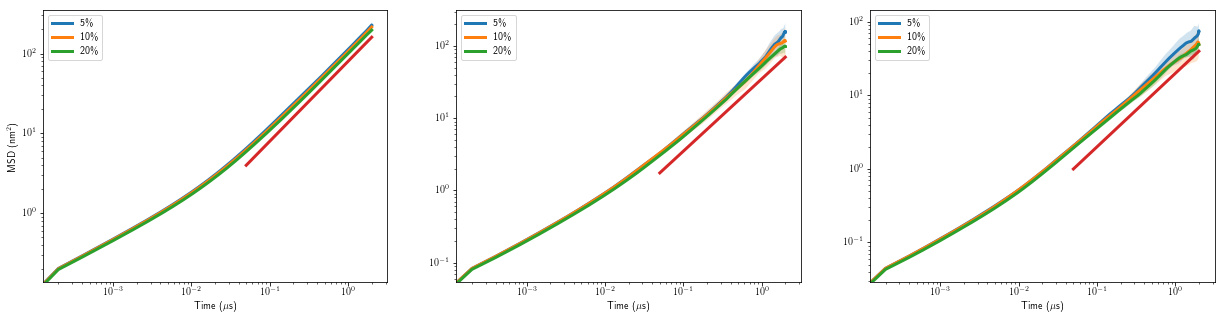

In [3]:
# print(m_std[0])

loglog = True

plt.subplot(132)
plt.xlabel('Time ($\mu$s)')
for (data, std), label in zip(zip(m_avgs, m_std), ("5\%", "10\%", "20\%")):

    ts = data[0]/1e6
    
    
    plt.plot(ts, data[1], linewidth=3, label=label)
    
    plt.fill_between(ts, \
                     np.sum((data[1], std[1]), axis=0), \
                     np.subtract(data[1], std[1]),\
                     alpha = 0.2)
    
    
    
# plt.xlim([0,1.1])
# plt.ylim([0,90])
plt.legend()
if loglog:
    plt.xscale('log')
    plt.yscale('log')
    _x = np.linspace(5e-2,2)
    plt.plot(_x, 35*_x, linewidth=3)
else:
#     plt.title("Monomer") 
    pass
    
plt.subplot(133)
plt.xlabel('Time ($\mu$s)')
for (data, std), label in zip(zip(t_avgs, t_std), ("5\%", "10\%", "20\%")):

    ts = data[0]/1e6
    print(ts)
    plt.plot(ts, data[1], linewidth=3, label=label)
#     print(std[1])
    
    plt.fill_between(ts, \
                     np.sum((data[1], std[1]), axis=0), \
                     np.subtract(data[1], std[1]),\
                     alpha = 0.2)
    



plt.legend(loc='upper left')

plt.gcf().set_size_inches(14,5)

# plt.xlim([0,1.1])
# plt.ylim([.02,100])
if loglog:
    plt.xscale('log')
    plt.yscale('log')
    _x = np.multiply(np.linspace(5e-2,2), 1)
    plt.plot(_x, 20*_x, linewidth=3)
else:
#     plt.title("Trimer")
    pass



plt.subplot(131)
plt.ylabel('MSD (nm$^2$)')
plt.xlabel('Time ($\mu$s)')
for (data, std), label in zip(zip(l_avgs, l_std), ("5\%", "10\%", "20\%")):

    ts = data[0]/1e6
    print(ts)
    plt.plot(ts, data[1], linewidth=3, label=label)
#     print(std[1])
    
    plt.fill_between(ts, \
                     np.sum((data[1], std[1]), axis=0), \
                     np.subtract(data[1], std[1]),\
                     alpha = 0.2)
    



plt.legend(loc='upper left')

plt.gcf().set_size_inches(21,5)

# plt.ylim([.2,250])
# plt.xlim([0,1.1])
if loglog:
    plt.xscale('log')
    plt.yscale('log')
    _x = np.multiply(np.linspace(5e-2,2), 1)
    plt.plot(_x, 80*_x, linewidth=3)
else:
#     plt.title("Lipid")
    pass
    
namestr = "linear"
if loglog:
    namestr = "loglog"

plt.savefig("crowded_msd_{}-paper.pdf".format(namestr), \
            bbox_inches = "tight", pad_inches = 0.1, transparent=True)

In [4]:
def calc_msd(t, D):
    return 4*D*t

Fitting from index 1000 to 10000
Fitting from time 2.0e-01 to 2.0e+00 us
1000
10000
--- Monomer ---
[14.69925828677145, 14.169615969344086, 13.106934111045993]
[1.4372129129925582, 3.212598899677117, 0.3079253761083099]
--- Trimer ----
[9.026518436619513, 7.645768992614324, 7.020868291108893]
[1.089303751278754, 1.765146809829536, 0.7025017269861481]
--- Lipid ----
[28.365613051267147, 26.82683987369879, 25.27675459980874]
[0.9787828211275921, 0.561698185243415, 0.2231336779704987]


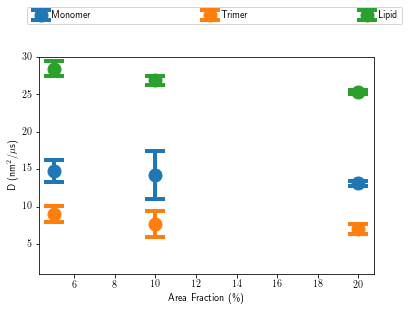

In [14]:
Ds = []
Derrs = []

dt = 200

fitbegin = int((2e-1)*1e6/200)
fitend = int(2e6/200)
# fitend = -1

print("Fitting from index %d to %d" % (fitbegin, fitend))
print("Fitting from time %.1e to %.1e us" % (fitbegin*200/1e6, fitend*200/1e6))
print(fitbegin)
print(fitend)

for curve, std in zip((m_avgs + t_avgs + l_avgs),\
                      (m_std + t_std + l_std)):
    
    popt, pcov = curve_fit(lambda t,D: 4*D*t, curve[0][fitbegin:fitend], \
                           curve[1][fitbegin:fitend],
                          sigma=std[1][fitbegin:fitend])
    perr = np.sqrt(np.diag(pcov))
    
    upper, _ = curve_fit(lambda t,D: 4*D*t, curve[0][fitbegin:fitend], \
                         np.add(curve[1][fitbegin:fitend], std[1][fitbegin:fitend]),
                          sigma=std[1][fitbegin:fitend])
    
    lower, _ = curve_fit(lambda t,D: 4*D*t, curve[0][fitbegin:fitend], \
                         np.subtract(curve[1][fitbegin:fitend], std[1][fitbegin:fitend]),
                          sigma=std[1][fitbegin:fitend])
    
    Ds.append(popt)
    Derrs.append(upper-popt)
    
# D are all in units of nm^2/ps
# 1e-5 nm^2/ps = 10nm^2/us
# Converts to nm^2/us
CONVERSION_FACTOR = 1e6
    
print("--- Monomer ---")
m_Ds = [x[0]*CONVERSION_FACTOR for x in Ds[:3]]
m_errs = [x[0]*CONVERSION_FACTOR for x in Derrs[:3]]
print(m_Ds)
print(m_errs)

print("--- Trimer ----")
t_Ds = [x[0]*CONVERSION_FACTOR for x in Ds[3:6]]
t_errs = [x[0]*CONVERSION_FACTOR for x in Derrs[3:6]]
print(t_Ds)
print(t_errs)

print("--- Lipid ----")
l_Ds = [x[0]*CONVERSION_FACTOR for x in Ds[6:]]
l_errs = [x[0]*CONVERSION_FACTOR for x in Derrs[6:]]
print(l_Ds)
print(l_errs)

plt.figure(figsize=(6,4))

# from matplotlib.ticker import FormatStrFormatter
# plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.e'))

# plt.ticklabel_format(axis='y', style='sci', scilimits=(-7,-3))

plt.errorbar([5,10,20], m_Ds, m_errs, fmt='o', markersize=13, \
             capthick=4, capsize=10, elinewidth=4, label="Monomer")
plt.errorbar([5,10,20], t_Ds, t_errs, fmt='o', markersize=13, \
             capthick=4, capsize=10, elinewidth=4, label="Trimer")
plt.errorbar([5,10,20], l_Ds, l_errs, fmt='o', markersize=13, \
             capthick=4, capsize=10, elinewidth=4, label="Lipid")

plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(-0.05,1., 1.15, .25), \
           mode="expand", handletextpad=0.1)

plt.xlabel("Area Fraction (\%)")
plt.ylabel("D (nm$^2$/$\mu$s)")
plt.ylim([1,30])

plt.savefig("DvsAF-slides.pdf", bbox_inches = "tight", pad_inches = 0.1 , transparent=True)

### Correct lipid diffusion constants for bound shell

10/52 monomer/trimer bound lipids for 0
Monomer D: 1.47e+01
Trimer D: 9.03e+00
-1.8967912248800367
15/79 monomer/trimer bound lipids for 1
Monomer D: 1.42e+01
Trimer D: 7.65e+00
-1.7787131753316672
26/132 monomer/trimer bound lipids for 2
Monomer D: 1.31e+01
Trimer D: 7.02e+00
-1.6434550266929833


<Container object of 3 artists>

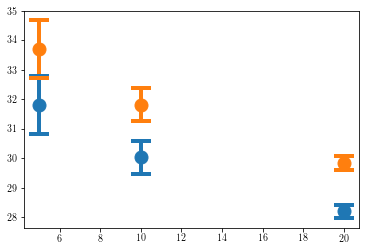

In [17]:

plt.errorbar([5,10,20], l_Ds, l_errs, fmt='o', markersize=13, \
             capthick=4, capsize=10, elinewidth=4, label="Lipid")


l_corrected = l_Ds
l_corr_errs = l_errs

N_LIPIDS = [2485, 2370, 2105]
N_MONOMERS = [4, 6, 10]
N_TRIMERS = [4, 6, 10]

R_MONOMER = 1.3
R_TRIMER = 2.9
R_LIPID = 1.0

for i in range(len(N_LIPIDS)):
    monomer_circum = np.pi * (N_MONOMERS[i] * R_MONOMER**2)
    trimer_circum = np.pi * (N_TRIMERS[i] * R_TRIMER**2)
    
    N_TRIMER_BOUND = trimer_circum / (R_LIPID*2.)
    N_MONOMER_BOUND = monomer_circum / (R_LIPID*2.)
    N_BOUND = N_TRIMER_BOUND + N_MONOMER_BOUND
    
    N_TOT = N_LIPIDS[i]
    N_FREE = N_LIPIDS[i] - N_BOUND_LIPIDS
    
    print("%d/%d monomer/trimer bound lipids for %d" % (N_MONOMER_BOUND, N_TRIMER_BOUND, i))
    
    print("Monomer D: %.2e" % np.mean(m_Ds[i]))
    print("Trimer D: %.2e" % np.mean(t_Ds[i]))
    
    corrected_D = (N_TOT / N_FREE) * l_Ds[i] -\
                    (N_TRIMER_BOUND / N_FREE)*np.mean(t_Ds[i]) -\
                    (N_MONOMER_BOUND / N_FREE)*np.mean(m_Ds[i])
    
    print(l_Ds[i] - corrected_D)
    
    l_corrected[i] = corrected_D

plt.errorbar([5,10,20], l_corrected, l_corr_errs, fmt='o', markersize=13, \
             capthick=4, capsize=10, elinewidth=4, label="Lipid")